## Echantillonnage des données

In [57]:
import zipfile 
import pandas as pd   
data=pd.read_csv("archive (1).zip")  #chargement des donnees

In [58]:
# afficher les 5 premier
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 

In [60]:
# Charger le jeu de données 
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
# Définir le modèle
model = LinearRegression()
# Définir K-fold cross-validation (K=5)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen : {cv_scores.mean()}")

Scores de validation croisée : [0.71111845 0.52262859 0.66295326 0.44130702 0.5846813 ]
Score moyen : 0.58453772251565


## Exploration et prétraitement des données 

## Partie1

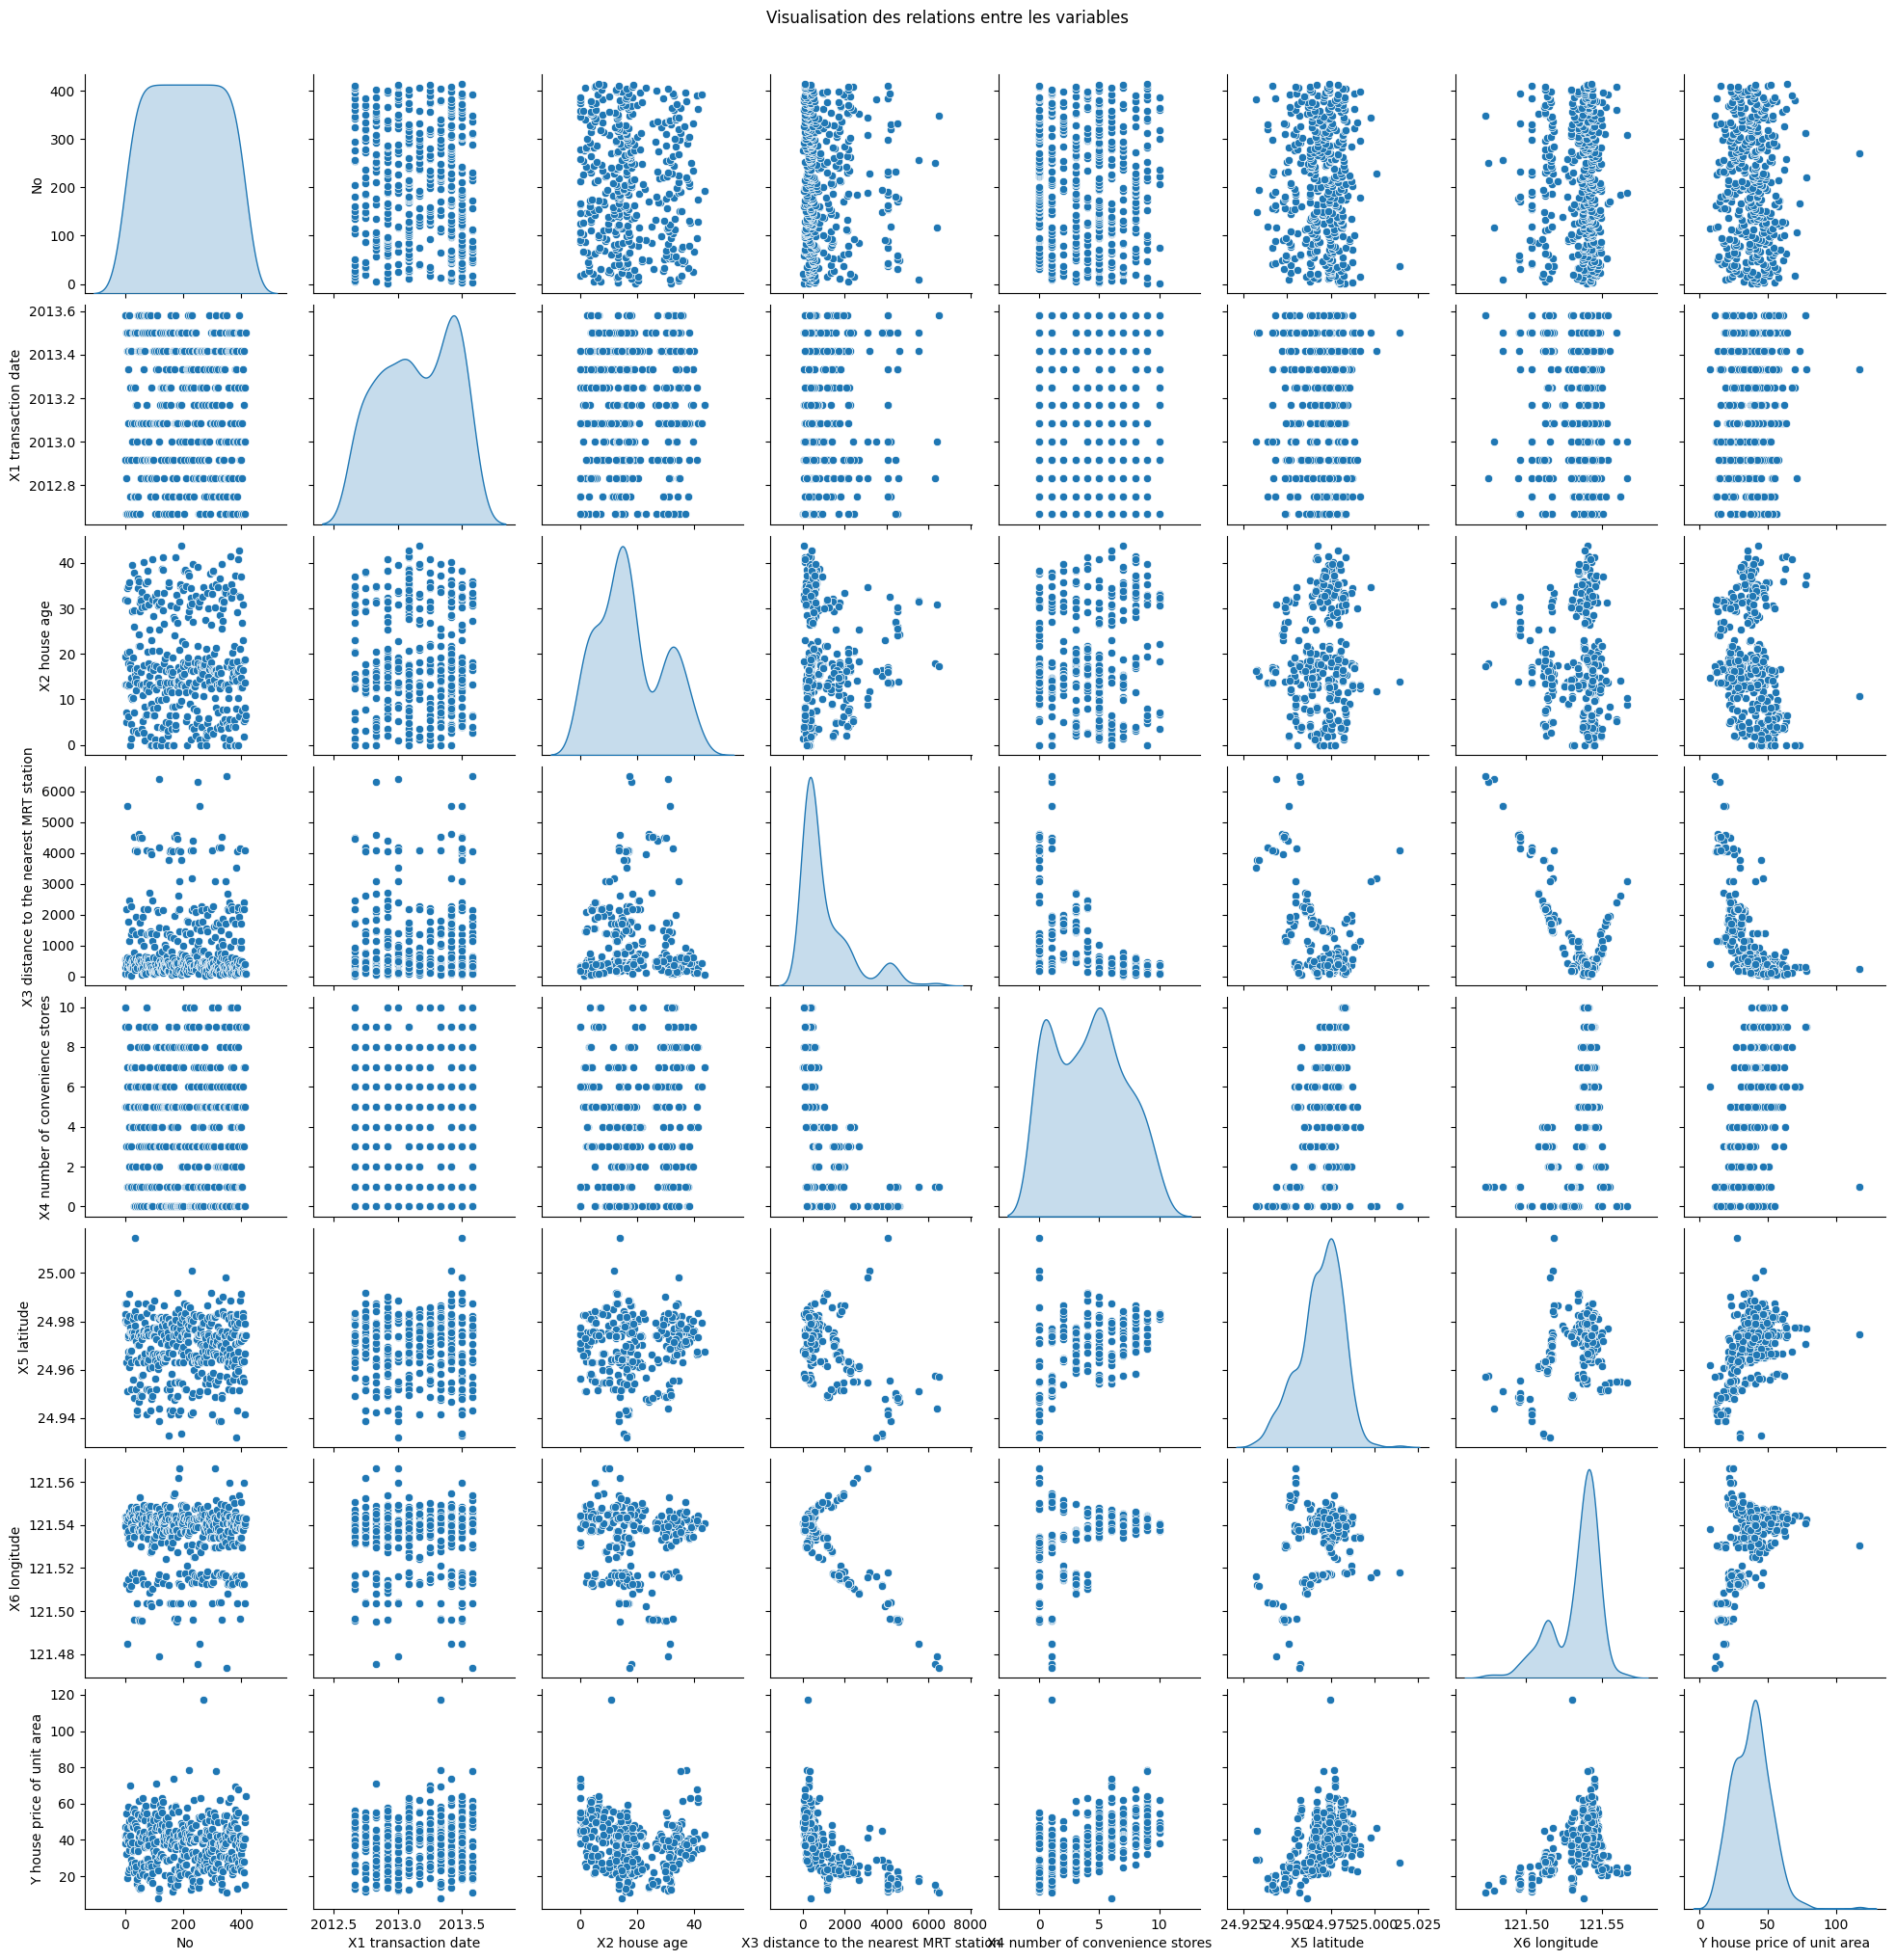

In [61]:
# Visualisation des relations entre les variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Visualisation des relations entre les variables", y=1.02)
plt.show()

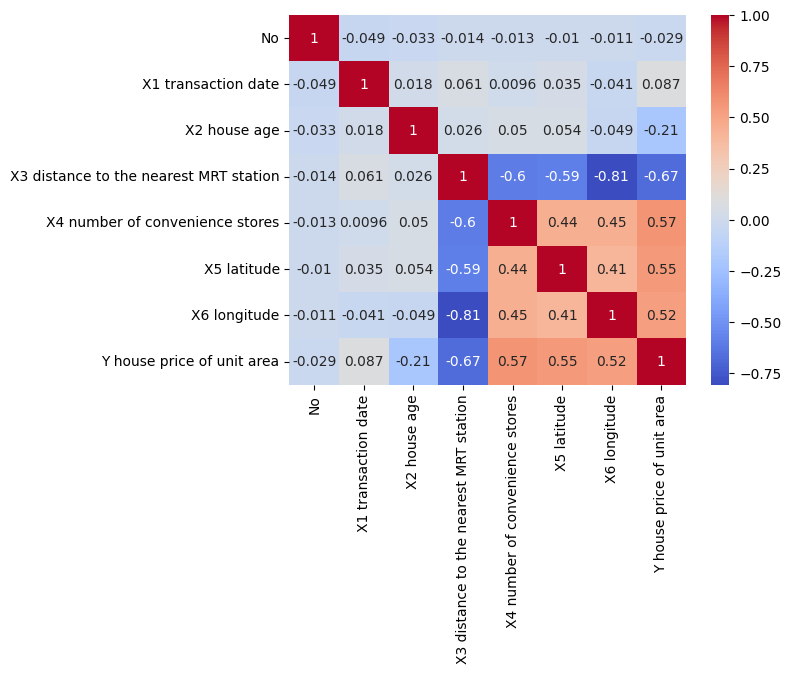

In [62]:
# visualisation des corrélations
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

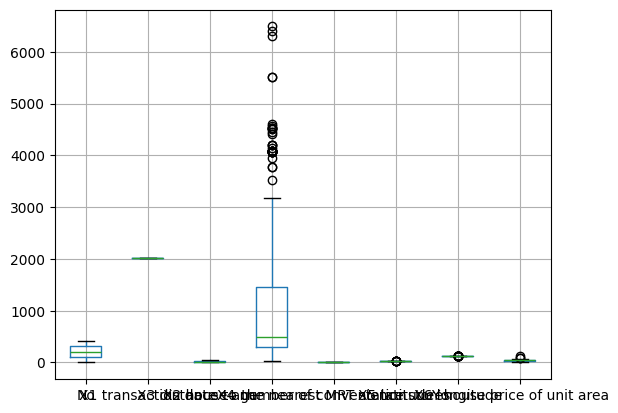

In [63]:
# détection des valeurs aberrantes
data.boxplot()

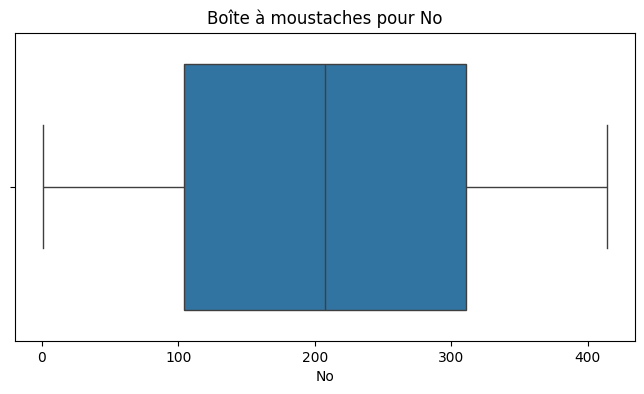

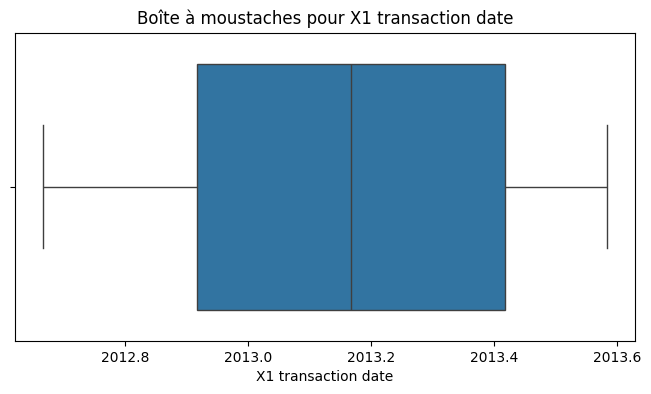

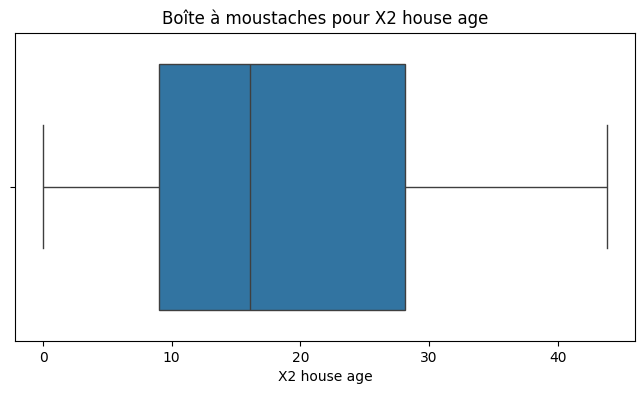

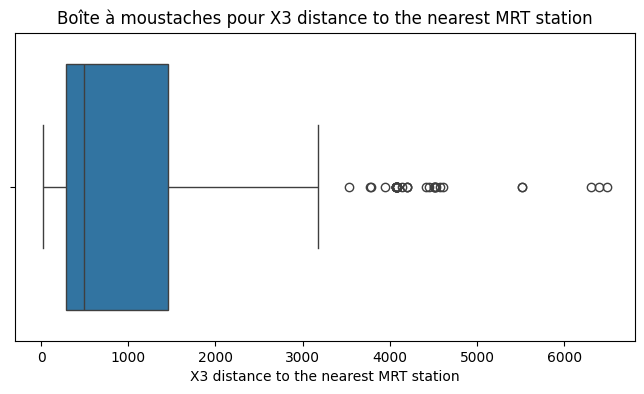

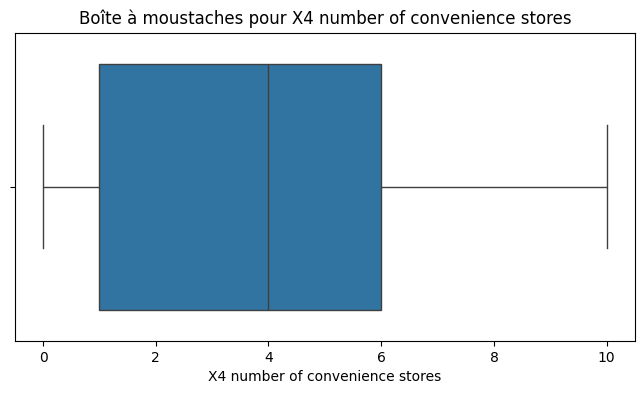

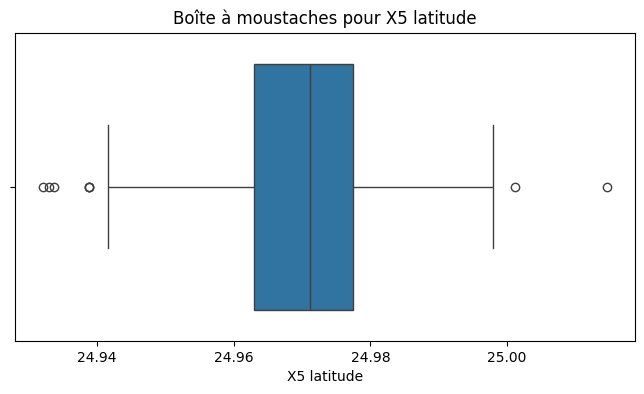

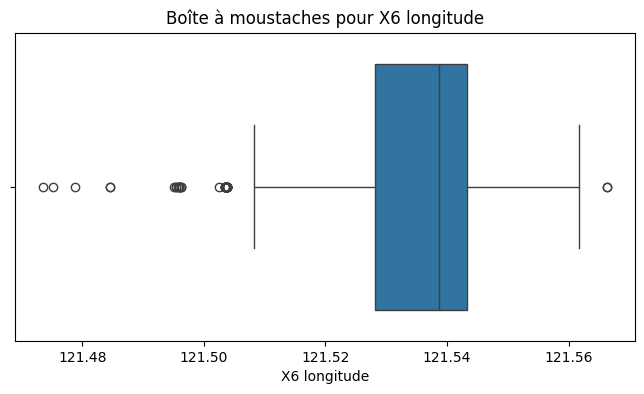

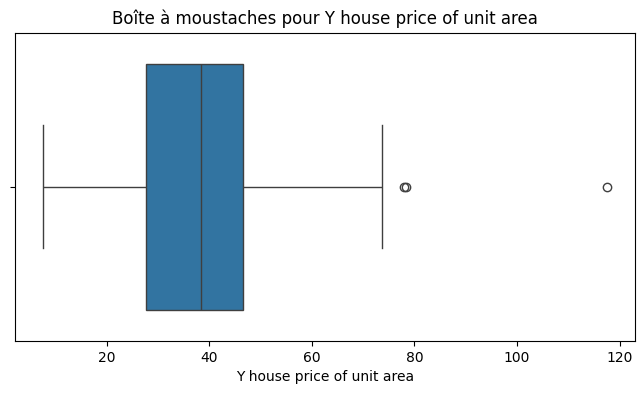

In [64]:
# Boîte à moustaches pour chaque variable
for col in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boîte à moustaches pour {col}")
    plt.show()

## Partie 2 Nettoyage des donnees

In [65]:
# chargement des donnees
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [66]:
# Gestion des valeurs manquants
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [67]:
# Gestion des valeurs categorielles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [68]:
# Gestion des valeurs doublons
print("Nombre de doublons :", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Nombre de doublons : 0


In [69]:
# Gestion des colonnes inutiles
# Renommer les colonnes pour plus de clarté
data = data.rename(columns={
    "X1 transaction date": "Transaction_Date",
    "X2 house age": "House_Age",
    "X3 distance to the nearest MRT station": "Distance_to_MRT",
    "X4 number of convenience stores": "Convenience_Stores",
    "X5 latitude": "Latitude",
    "X6 longitude": "Longitude",
    "Y house price of unit area": "Price_per_Unit_Area"
})
data.head()

,No,Transaction_Date,House_Age,Distance_to_MRT,Convenience_Stores,Latitude,Longitude,Price_per_Unit_Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [70]:
# Suprision la columns 'No'
data = data.drop(columns=['No'])
data.head()

,Transaction_Date,House_Age,Distance_to_MRT,Convenience_Stores,Latitude,Longitude,Price_per_Unit_Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [71]:
from datetime import datetime, timedelta  # Importer les modules nécessaires
# Fonction de conversion des années décimales en date
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    days = (decimal_year - year) * 365  # Approximation des jours
    date = datetime(year, 1, 1) + timedelta(days=days)
    return date

# Vérification du type de la colonne 'Transaction_Date' (décimale)
print("Type de la colonne 'Transaction_Date' : ", data['Transaction_Date'].dtype)

# Appliquer la fonction de conversion sur la colonne 'Transaction_Date'
data['Converted_Transaction_Date'] = data['Transaction_Date'].apply(decimal_year_to_date)
# Affichage des premières lignes pour vérifier le résultat
print(data.head())



Type de la colonne 'Transaction_Date' :  float64
   Transaction_Date  House_Age  Distance_to_MRT  Convenience_Stores  Latitude  \
0          2012.917       32.0         84.87882                  10  24.98298   
1          2012.917       19.5        306.59470                   9  24.98034   
2          2013.583       13.3        561.98450                   5  24.98746   
3          2013.500       13.3        561.98450                   5  24.98746   
4          2012.833        5.0        390.56840                   5  24.97937   

   Longitude  Price_per_Unit_Area Converted_Transaction_Date  
0  121.54024                 37.9 2012-11-30 16:55:11.999997  
1  121.53951                 42.2 2012-11-30 16:55:11.999997  
2  121.54391                 47.3 2013-08-01 19:04:48.000003  
3  121.54391                 54.8 2013-07-02 12:00:00.000000  
4  121.54245                 43.1 2012-10-31 01:04:48.000003  


In [72]:
data['Converted_Transaction_Date'] = pd.to_datetime(data['Converted_Transaction_Date'])
data['Transaction_Date'] = data['Converted_Transaction_Date'].dt.date
print(data[['Transaction_Date']])

    Transaction_Date
0         2012-11-30
1         2012-11-30
2         2013-08-01
3         2013-07-02
4         2012-10-31
..               ...
409       2013-01-01
410       2012-08-31
411       2013-04-02
412       2013-01-01
413       2013-07-02

[414 rows x 1 columns]


In [73]:
# Afficher les 20 premières lignes d'un DataFrame
data.head(20)

,Transaction_Date,House_Age,Distance_to_MRT,Convenience_Stores,Latitude,Longitude,Price_per_Unit_Area,Converted_Transaction_Date
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003
5,2012-08-31,7.1,2175.03000,3,24.96305,121.51254,32.1,2012-08-31 10:55:11.999997
6,2012-08-31,34.5,623.47310,7,24.97933,121.53642,40.3,2012-08-31 10:55:11.999997
7,2013-06-02,20.3,287.60250,6,24.98042,121.54228,46.7,2013-06-02 04:55:11.999997
8,2013-07-02,31.7,5512.03800,1,24.95095,121.48458,18.8,2013-07-02 12:00:00.000000
9,2013-06-02,17.9,1783.18000,3,24.96731,121.51486,22.1,2013-06-02 04:55:11.999997


In [79]:
from datetime import datetime
#converir une data complete vers year et month et day 
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
# Extraire des caractéristiques temporelles
data['Year'] = data['Transaction_Date'].dt.year
data['month'] = data['Transaction_Date'].dt.month
data['day'] = data['Transaction_Date'].dt.weekday  # 0 = Lundi, 6 = Dimanche

# Afficher le DataFrame modifié
data

,Transaction_Date,House_Age,Distance_to_MRT,Convenience_Stores,Latitude,Longitude,Price_per_Unit_Area,Converted_Transaction_Date,Year,month,day
0,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,11,4
1,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,11,4
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,8,3
3,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,7,1
4,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,10,2
...,...,...,...,...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4,2013-01-01 00:00:00.000000,2013,1,1
410,2012-08-31,5.6,90.45606,9,24.97433,121.54310,50.0,2012-08-31 10:55:11.999997,2012,8,4
411,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6,2013-04-02 06:00:00.000000,2013,4,1
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5,2013-01-01 00:00:00.000000,2013,1,1


In [83]:
#convertir int (year, month,day, convenience_Stores) to float 
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['month'] = pd.to_numeric(data['month'], errors='coerce')
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['Convenience_Stores'] = pd.to_numeric(data['Convenience_Stores'], errors='coerce')
data['Year'] = data['Year'].astype(float)
data['month'] =data['month'].astype(float)
data['day'] = data['day'].astype(float)
data['Convenience_Stores'] = data['Convenience_Stores'].astype(float)
data = data.drop(columns=['Transaction_Date'])
data = data.drop(columns=['Converted_Transaction_Date'])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House_Age            414 non-null    float64
 1   Distance_to_MRT      414 non-null    float64
 2   Convenience_Stores   414 non-null    float64
 3   Latitude             414 non-null    float64
 4   Longitude            414 non-null    float64
 5   Price_per_Unit_Area  414 non-null    float64
 6   Year                 414 non-null    float64
 7   month                414 non-null    float64
 8   day                  414 non-null    float64
dtypes: float64(9)
memory usage: 29.2 KB


In [85]:
# Gestion des valeurs aberrantes
# Calcul des quartiles et de l'IQR
Q1 = data['Distance_to_MRT'].quantile(0.25)
Q3 = data['Distance_to_MRT'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes et comptage
nb_outliers = len(data[(data['Distance_to_MRT'] < lower_bound) | (data['Distance_to_MRT'] > upper_bound)])

print("Nombre de lignes avec des valeurs aberrantes :", nb_outliers)

Nombre de lignes avec des valeurs aberrantes : 37


In [86]:
# Calcul des quartiles et de l'IQR
Q1 = data['Longitude'].quantile(0.25)
Q3 = data['Longitude'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes et comptage
nb_outliers = len(data[(data['Longitude'] < lower_bound) | (data['Longitude'] > upper_bound)])

print("Nombre de lignes avec des valeurs aberrantes :", nb_outliers)

Nombre de lignes avec des valeurs aberrantes : 35


In [87]:
# Calcul des quartiles et de l'IQR
Q1 = data['Latitude'].quantile(0.25)
Q3 = data['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes et comptage
nb_outliers = len(data[(data['Latitude'] < lower_bound) | (data['Latitude'] > upper_bound)])

print("Nombre de lignes avec des valeurs aberrantes :", nb_outliers)

Nombre de lignes avec des valeurs aberrantes : 8


In [88]:
# Calcul des quartiles et de l'IQR
Q1 = data['Price_per_Unit_Area'].quantile(0.25)
Q3 = data['Price_per_Unit_Area'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes et comptage
nb_outliers = len(data[(data['Price_per_Unit_Area'] < lower_bound) | (data['Price_per_Unit_Area'] > upper_bound)])

print("Nombre de lignes avec des valeurs aberrantes :", nb_outliers)

Nombre de lignes avec des valeurs aberrantes : 3


In [89]:
# Fonction pour détecter et remplacer les outliers par la médiane
def replace_outliers_with_median(data):
    for column in data.columns:
        # Calcul des bornes IQR
        Q1 = data['Distance_to_MRT'].quantile(0.25)
        Q3 = data['Distance_to_MRT'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes pour détecter les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remplacer les outliers par la médiane de la colonne
        data['Distance_to_MRT'] = data['Distance_to_MRT'].apply(lambda x: data['Distance_to_MRT'].median() if x < lower_bound or x > upper_bound else x)
    
    return data

# Remplacer les outliers par la médiane
data_cleaned_median = replace_outliers_with_median(data)


In [90]:
# Fonction pour détecter et remplacer les outliers par la moyenne
def replace_outliers_with_mean(data):
    for column in data.columns:
        # Calcul des bornes IQR
        Q1 = data['Longitude'].quantile(0.25)
        Q3 = data['Longitude'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Définir les bornes pour détecter les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remplacer les outliers par la moyenne de la colonne
        data['Longitude'] = data['Longitude'].apply(lambda x: data['Longitude'].mean() if x < lower_bound or x > upper_bound else x)
    
    return data

# Remplacer les outliers par la moyenne
data_cleaned_mean = replace_outliers_with_mean(data)

In [92]:
#supprimer aberrantes latitde 
q1 = data['Latitude'].quantile(0.25)
q3 = data['Latitude'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Latitude'] >= lower_bound) & (data['Latitude'] <= upper_bound)]

In [93]:
#supprimer aberrantes Price per unit erea
q1 = data['Price_per_Unit_Area'].quantile(0.25)
q3 = data['Price_per_Unit_Area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Price_per_Unit_Area'] >= lower_bound) & (data['Price_per_Unit_Area'] <= upper_bound)]

In [94]:
data.shape

(403, 9)

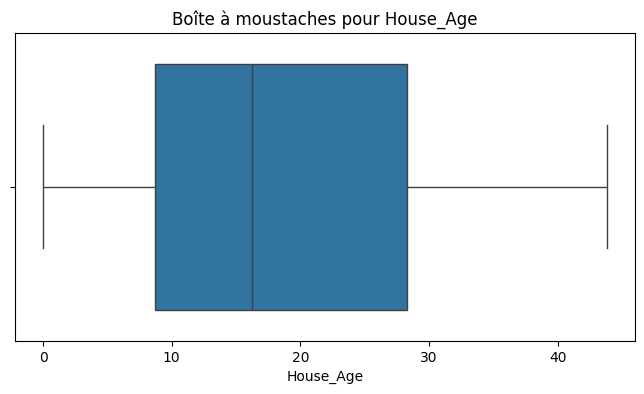

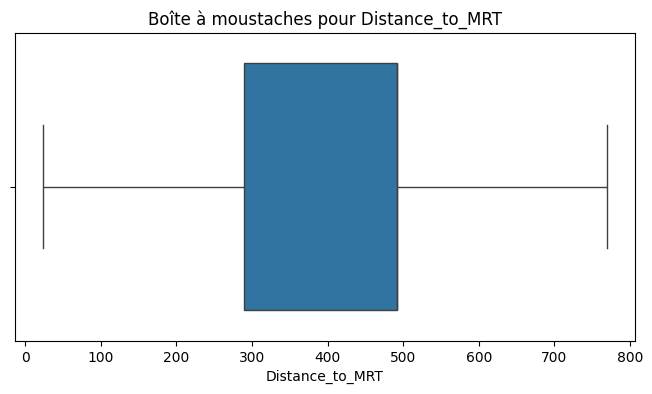

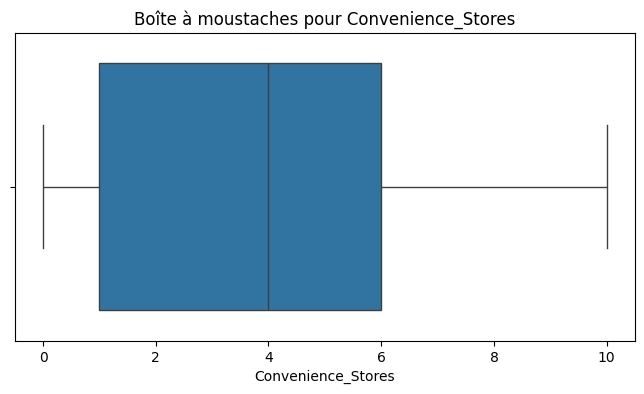

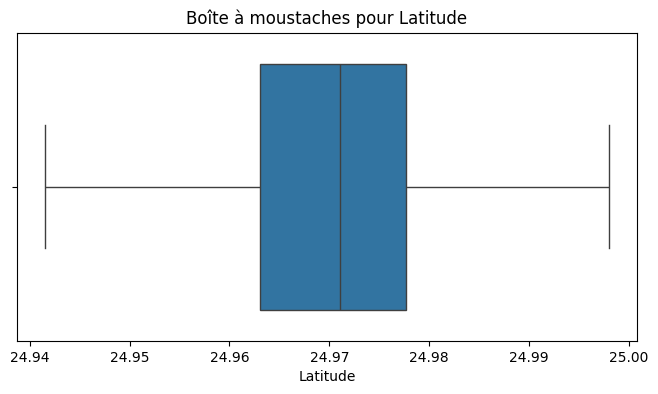

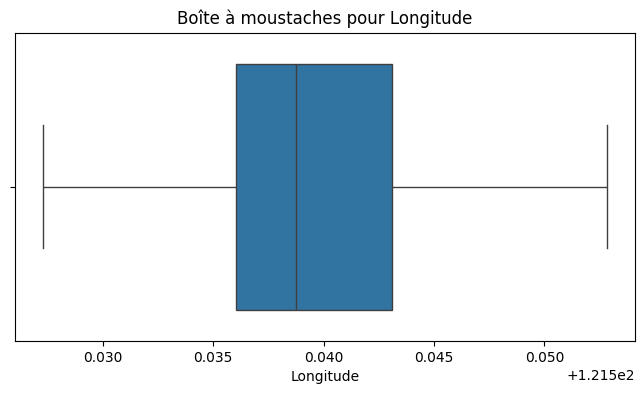

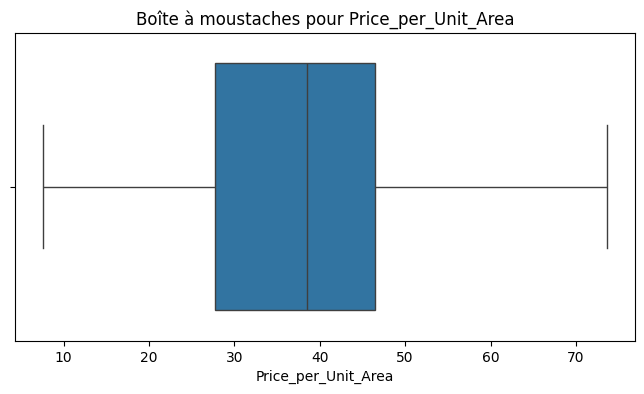

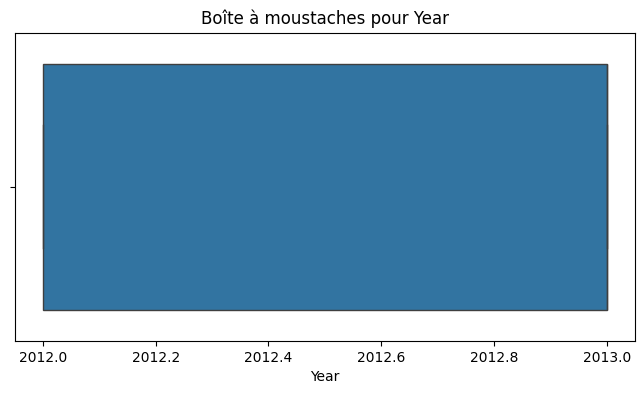

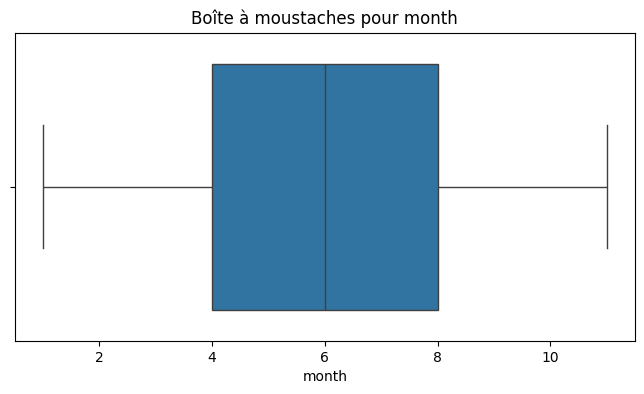

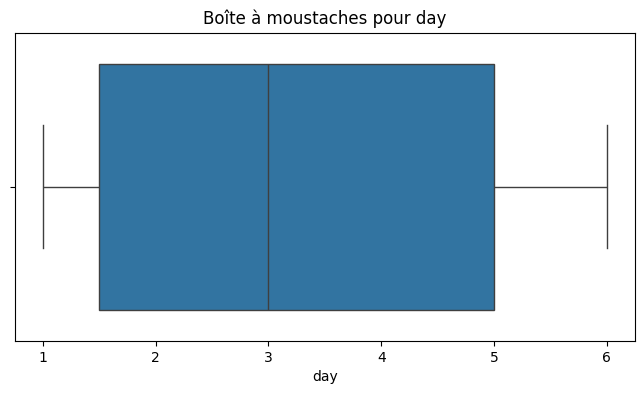

In [95]:
# Boîte à moustaches pour chaque variable
for col in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boîte à moustaches pour {col}")
    plt.show()

In [96]:
# Mise a l'echelle des donnees
#Normalisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Normaliser les caractéristiques
scaler = MinMaxScaler()
data[['year','month','day', 'House_Age','Distance_to_MRT','Convenience_Stores','Latitude','Longitude']] = scaler.fit_transform(data[['Year','month','day', 'House_Age','Distance_to_MRT','Convenience_Stores','Latitude','Longitude']])

In [97]:
data.describe()

,House_Age,Distance_to_MRT,Convenience_Stores,Latitude,Longitude,Price_per_Unit_Area,Year,month,day,year
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.404229,0.504872,0.415881,0.491466,0.466141,37.770720,2012.689826,0.504715,0.466501,0.689826
std,0.261538,0.212405,0.290386,0.204780,0.205130,12.730558,0.463140,0.318817,0.360409,0.463140
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,2012.000000,0.000000,0.000000,0.000000
25%,0.198630,0.356481,0.100000,0.380868,0.343099,27.700000,2012.000000,0.300000,0.100000,0.000000
50%,0.369863,0.628466,0.400000,0.523472,0.448276,38.500000,2013.000000,0.500000,0.400000,1.000000
75%,0.646119,0.628466,0.600000,0.640478,0.619122,46.500000,2013.000000,0.700000,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,73.600000,2013.000000,1.000000,1.000000,1.000000


## Implémentation des modèles de régression

## 1.Régression linéaire simple

In [98]:
x = data[['House_Age']]  # Exemple avec une seule caractéristique
Y = data['Price_per_Unit_Area']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [99]:
# division des donnees
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [100]:
# entrener ddonnees
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [101]:
predictions = model.predict(x_test)

In [105]:
# Calculer MSE et de précision
import numpy as np
mse_ln = np.mean((Y_test - predictions) ** 2)
# Calcul de la moyenne des valeurs réelles
Y_mean = np.mean(Y_test)

# Calcul de la somme des carrés des erreurs (SSE) et de la somme totale des carrés (SST)
sse = np.sum((Y_test - predictions ) ** 2)  # Erreur quadratique
sst = np.sum((Y_test - Y_mean) ** 2)  # Variabilité totale

# Calcul du R²
r2_ln = 1 - (sse / sst)

In [106]:
print(f"MSE (Mean Squared Error) : {mse_ln}")
print(f"Précision (R²) : {r2_ln}")

MSE (Mean Squared Error) : 181.7469641636316
Précision (R²) : 0.022716302054789805


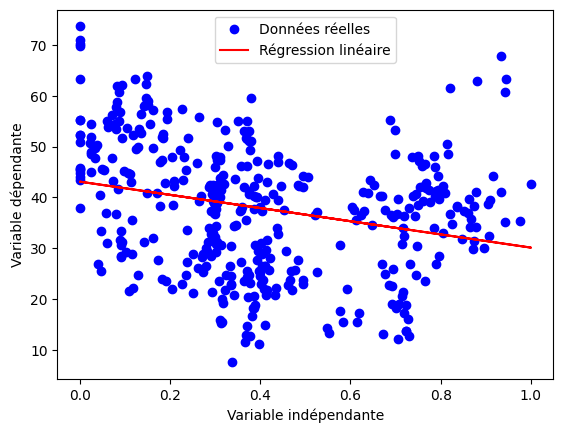

In [107]:
# Visualiser les résultats
plt.scatter(x, Y, color='blue', label='Données réelles')  # Données réelles
plt.plot(x, model.predict(x), color='red', label='Régression linéaire')  # Ligne de régression
plt.xlabel('Variable indépendante')
plt.ylabel('Variable dépendante')
plt.legend()
plt.show()

In [108]:
# Calcul manuel des paramètres avec cov et var
# Moyennes des données
x_mean = np.mean(x_train)
y_mean = np.mean(Y_train)

# Covariance entre X et Y
cov_xy = np.sum((x_train['House_Age'] - x_mean) * (Y_train - y_mean)) / len(x_train)

# Variance de X
var_x = np.sum((x_train['House_Age'] - x_mean) ** 2) / len(x_train)

# Calcul des paramètres
beta_1 = cov_xy / var_x
beta_0 = y_mean - beta_1 * x_mean

print(f"Paramètre β₁ (coefficient) : {beta_1}")
print(f"Paramètre β₀ (intercept) : {beta_0}")

Paramètre β₁ (coefficient) : -12.952614870406995
Paramètre β₀ (intercept) : 43.10590210502375


## Régression polynomiale

In [109]:
# Importation des bibliothèques nécessaires
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
mse_poly_2 = None
mse_poly_3 = None
mse_poly_4 = None
r2_poly_2 = None
r2_poly_3 = None
r2_poly_4 = None
# Boucle pour tester différents degrés de polynômes
for degree in [2, 3, 4]:
    # Création du pipeline avec les caractéristiques polynomiales et la régression linéaire
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Entraînement du modèle
    model.fit(x_train, Y_train)
    
    # Prédictions
    predictions_poly = model.predict(x_test)
    
    # Évaluation
    mse = mean_squared_error(Y_test, predictions_poly)
    r2 = r2_score(Y_test, predictions_poly)  # Calcul explicite du R² pour plus de clarté
    if degree == 2:
        mse_poly_2 = mse
        r2_poly_2 =r2
    elif degree == 3:
        mse_poly_3 = mse
        r2_poly_3 = r2
    elif degree == 4:
        mse_poly_4 = mse
        r2_poly_4 = r2
    
   
        
    # Affichage des résultats
    print(f"Régression polynomiale (degré {degree}) - MSE : {mse:.4f}")
    print(f"R² score : {r2:.4f}")


Régression polynomiale (degré 2) - MSE : 135.2200
R² score : 0.2729
Régression polynomiale (degré 3) - MSE : 134.4745
R² score : 0.2769
Régression polynomiale (degré 4) - MSE : 134.5920
R² score : 0.2763


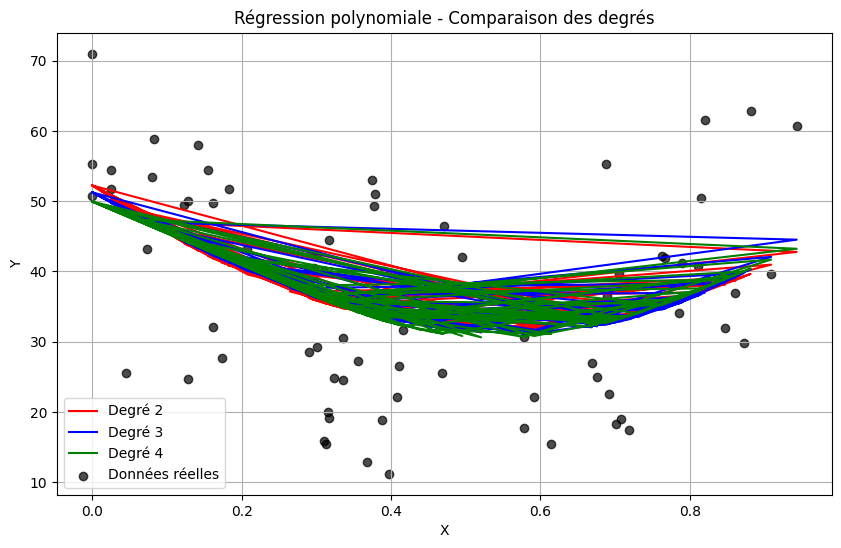

In [110]:
# Tracé des résultats
plt.figure(figsize=(10, 6))

degrees = [2, 3, 4]
colors = ['red', 'blue', 'green']

for i, degree in enumerate(degrees):
    # Création du pipeline avec les caractéristiques polynomiales et la régression linéaire
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Entraînement du modèle
    model.fit(x_train, Y_train)

    # Prédictions
    predictions_poly = model.predict(x_test)

    # Tracé des prédictions
    plt.plot(x_test, predictions_poly, label=f'Degré {degree}', color=colors[i])

# Tracé des données réelles
plt.scatter(x_test, Y_test, color='black', label='Données réelles', alpha=0.7)

# Configuration du graphique
plt.title("Régression polynomiale - Comparaison des degrés")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [111]:
import numpy as np

# Fonction pour calculer les coefficients avec X^T X
def calculate_coefficients(x_train, y_train, degree):
    # Ajout des caractéristiques polynomiales
    poly_features = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly_features.fit_transform(x_train)
    
    # Ajout de la colonne de biais (pour l'intercept)
    X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]  # Ajout d'une colonne de 1 (biais)
    
    # Calcul des coefficients : β = (X^T X)^-1 X^T Y
    X_T = X_poly.T
    beta = np.linalg.inv(X_T @ X_poly) @ X_T @ y_train
    
    return beta

# Test pour les degrés 2, 3, et 4
for degree in [2, 3, 4]:
    coefficients = calculate_coefficients(x_train.values, Y_train.values, degree)
    print(f"Coefficients pour degré {degree} : {coefficients}")


Coefficients pour degré 2 : [ 52.24873162 -75.3760234   69.29222902]
Coefficients pour degré 3 : [ 51.26661461 -60.54432447  25.45339452  33.06341776]
Coefficients pour degré 4 : [  49.95511596  -26.95628899 -140.22491975  306.70820948 -143.90923604]


## 3.1.Ridge

In [112]:
from sklearn.linear_model import Lasso, Ridge
x = data[['year','month','day', 'House_Age','Distance_to_MRT','Convenience_Stores','Latitude','Longitude']]  # Plusieurs caractéristiques
Y = data['Price_per_Unit_Area']

In [113]:
# diviser datset
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [114]:
# Appliquer la régression Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, Y_train)
predictions_ridge = ridge.predict(x_test)

In [115]:
mse_ridge = mean_squared_error(Y_test, predictions_ridge)

In [116]:
print("\nRégression Ridge :")
print(f"  - MSE : {mse_ridge:.2f}")
r2_ridge = r2_score(Y_test,predictions_ridge)
print(f"  - R² : {r2_ridge:.2f}")


Régression Ridge :
  - MSE : 87.63
  - R² : 0.53


In [117]:
import numpy as np

# Fonction pour calculer les coefficients Ridge
def ridge_coefficients(x_train, y_train, alpha):
    # Conversion en tableaux NumPy
    X = np.c_[np.ones(x_train.shape[0]), x_train]  # Ajout d'une colonne de biais (intercept)
    Y = y_train.values.reshape(-1, 1)
    
    # Calcul de (X^T X + αI)
    X_T_X = X.T @ X
    alpha_I = alpha * np.eye(X_T_X.shape[0])  # Matrice identité multipliée par alpha
    ridge_matrix = X_T_X + alpha_I
    
    # Calcul des coefficients : β = (X^T X + αI)^-1 X^T Y
    beta = np.linalg.inv(ridge_matrix) @ X.T @ Y
    
    return beta.flatten()

# Calcul des coefficients Ridge pour alpha = 1.0
alpha = 1.0
ridge_coeffs = ridge_coefficients(x_train, Y_train, alpha)

print(f"Coefficients Ridge pour α={alpha} : {ridge_coeffs}")

Coefficients Ridge pour α=1.0 : [ 27.38788259   3.49036345   2.43629631  -1.07268915 -10.93740551
 -19.01829866  10.1514325   26.07825648   7.89467338]


## 3.2.LASSO

In [118]:
# Appliquer la régression LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, Y_train)
predictions_lasso = lasso.predict(x_test)

In [119]:
mse_lasso = mean_squared_error(Y_test, predictions_lasso)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
print("Régression LASSO :")
print(f"  - MSE : {mse_lasso:.2f}")
from sklearn.metrics import mean_squared_error, r2_score
r2_lasso = r2_score(Y_test,predictions_lasso)
print(f"  - R² : {r2_lasso:.2f}")

Régression LASSO :
  - MSE : 86.71
  - R² : 0.53


In [121]:
import numpy as np

# Fonction pour implémenter Lasso par Coordinate Descent
def lasso_coefficients(x_train, y_train, alpha, max_iter=1000, tol=1e-4):
    # Conversion en tableaux NumPy
    X = np.c_[np.ones(x_train.shape[0]), x_train]  # Ajout d'une colonne pour l'intercept
    Y = y_train.values.reshape(-1, 1)
    
    # Initialisation des coefficients (tous à 0)
    beta = np.zeros((X.shape[1], 1))
    
    # Nombre de données et de caractéristiques
    n, p = X.shape
    
    # Boucle d'itération pour la convergence
    for iteration in range(max_iter):
        beta_old = beta.copy()
        
        for j in range(p):
            # Calcul du résidu sans la variable j
            residual = Y - X @ beta + X[:, j].reshape(-1, 1) * beta[j]
            
            # Mise à jour du coefficient beta_j
            rho = X[:, j].T @ residual
            
            if j == 0:  # Intercept (pas de régularisation)
                beta[j] = rho / n
            else:
                # Soft-thresholding
                if rho < -alpha:
                    beta[j] = (rho + alpha) / (X[:, j].T @ X[:, j])
                elif rho > alpha:
                    beta[j] = (rho - alpha) / (X[:, j].T @ X[:, j])
                else:
                    beta[j] = 0
        
        # Vérification de la convergence
        if np.max(np.abs(beta - beta_old)) < tol:
            break
    
    return beta.flatten()

# Calcul des coefficients Lasso pour alpha = 1.0
alpha = 1.0
lasso_coeffs = lasso_coefficients(x_train, Y_train, alpha)

print(f"Coefficients Lasso pour α={alpha} : {lasso_coeffs}")


Coefficients Lasso pour α=1.0 : [ 30.49398967   2.60724489   1.00841562  -1.38135005 -11.52699892
 -21.90343051   8.59268924  27.7774565    7.77593464]


## Évaluation et comparaison des modèles 

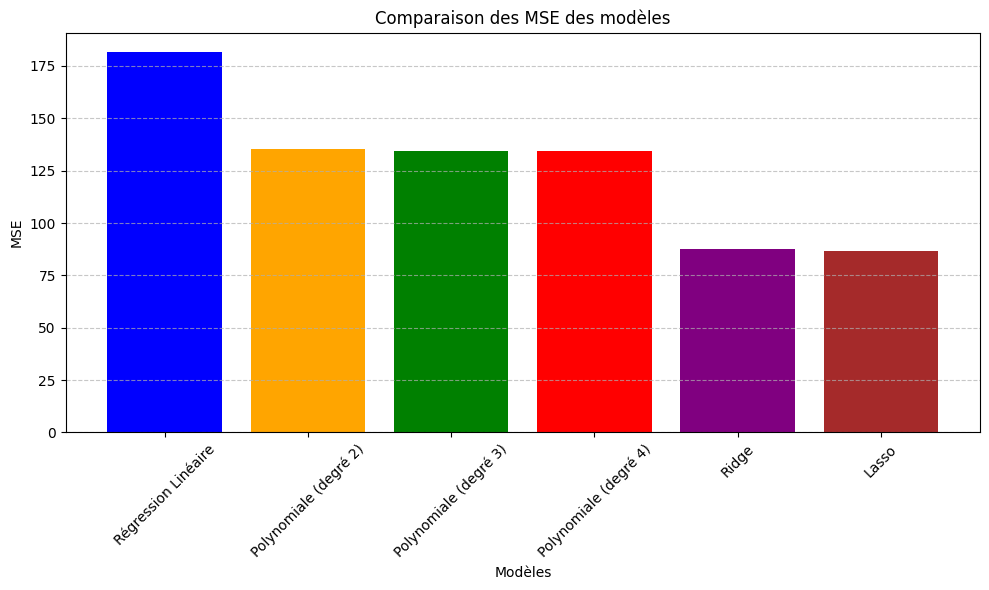

In [122]:
import matplotlib.pyplot as plt

# Liste des modèles à comparer
models = ['Régression Linéaire', 'Polynomiale (degré 2)', 'Polynomiale (degré 3)', 
          'Polynomiale (degré 4)', 'Ridge', 'Lasso']

# Liste des MSE pour chaque modèle (ces valeurs doivent être calculées préalablement)
mse_values = [mse_ln, mse_poly_2, mse_poly_3, mse_poly_4, mse_ridge, mse_lasso]

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Ajout des étiquettes et du titre
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.title('Comparaison des MSE des modèles')
plt.xticks(rotation=45)  # Rotation des noms des modèles pour lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale pour lisibilité
plt.tight_layout()  # Ajuste les marges pour éviter que le texte soit coupé
plt.show()

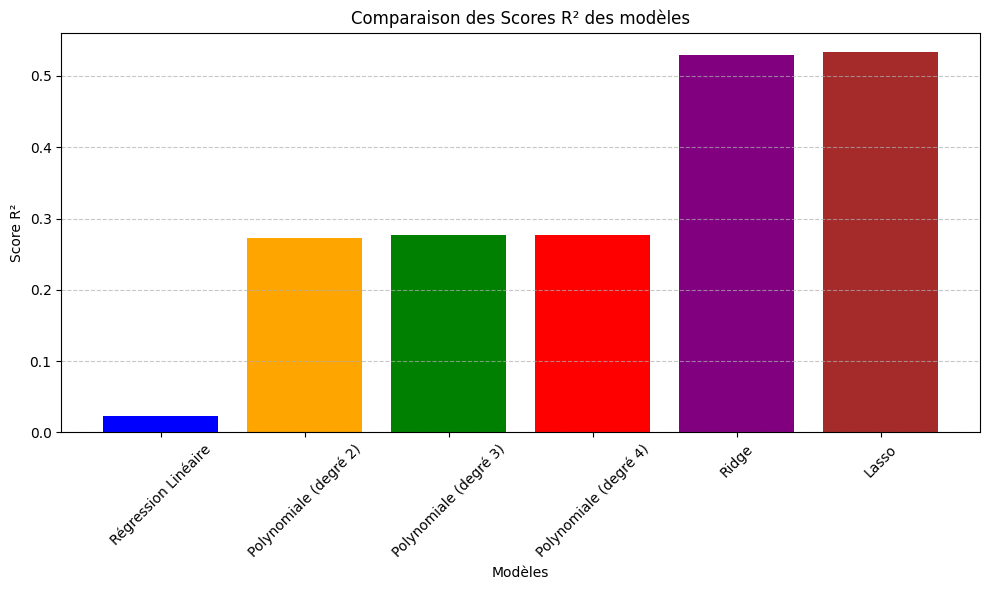

In [123]:
# Liste des scores R² correspondants
r2_values = [r2_ln, r2_poly_2,r2_poly_3, r2_poly_4, r2_ridge, r2_lasso]

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(models,r2_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'] )

# Ajout des étiquettes et du titre
plt.xlabel('Modèles')
plt.ylabel('Score R²')
plt.title('Comparaison des Scores R² des modèles')
plt.xticks(rotation=45)  # Rotation des noms des modèles pour lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale pour lisibilité
plt.tight_layout()  # Ajuste les marges pour éviter que le texte soit coupé
plt.show()

In [124]:
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Variables pour stocker les résultats
results = {
    "model_name": [],
    "train_time": [],
    "complexity": []
}

# Définir les modèles avec leurs noms
models = [
    ("Régression Linéaire", LinearRegression()),
    ("Polynomiale (degré 2)", make_pipeline(PolynomialFeatures(2), LinearRegression())),
    ("Polynomiale (degré 3)", make_pipeline(PolynomialFeatures(3), LinearRegression())),
    ("Polynomiale (degré 4)", make_pipeline(PolynomialFeatures(4), LinearRegression())),
    ("Ridge", Ridge()),
    ("Lasso", Lasso())
]

# Boucle sur les modèles
for name, model in models:
    start_time = time.time()
    model.fit(x_train, Y_train)  # Entraîner le modèle
    train_time = time.time() - start_time

    # Calcul de la complexité (nombre de paramètres)
    if hasattr(model, "coef_"):  # Modèles simples comme LinearRegression
        complexity = len(model.coef_)
    elif hasattr(model, "named_steps") and 'linearregression' in model.named_steps:
        complexity = len(model.named_steps['linearregression'].coef_)
    else:
        complexity = "N/A"  # Complexité non applicable

    # Stocker les résultats
    results["model_name"].append(name)
    results["train_time"].append(train_time)
    results["complexity"].append(complexity)

# Convertir les résultats en DataFrame pour simplifier l'affichage
results_df = pd.DataFrame(results)
print(results_df)

              model_name  train_time  complexity
0    Régression Linéaire    0.008634           8
1  Polynomiale (degré 2)    0.205384          45
2  Polynomiale (degré 3)    0.524983         165
3  Polynomiale (degré 4)    0.060171         495
4                  Ridge    0.009217           8
5                  Lasso    0.005449           8


<Figure size 1200x600 with 0 Axes>

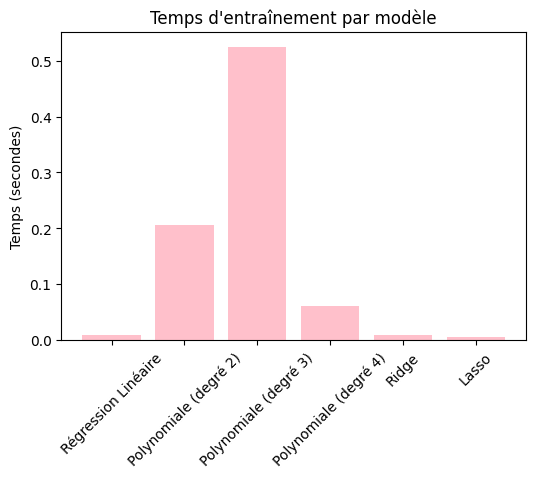

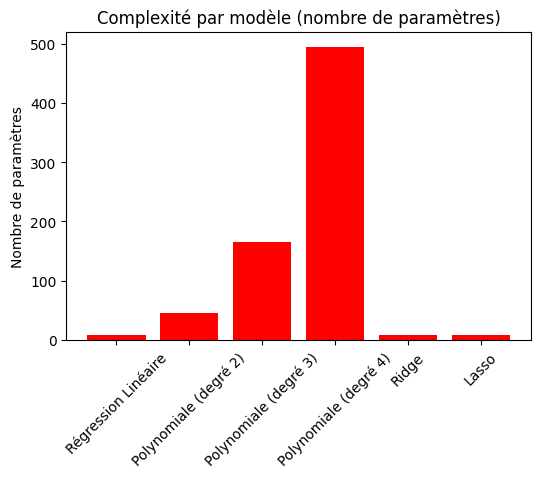

In [125]:
# Graphique MSE et R²
plt.figure(figsize=(12, 6))
# Temps d'entraînement
plt.figure(figsize=(6, 4))
plt.bar(results["model_name"], results["train_time"], color='pink')
plt.title("Temps d'entraînement par modèle")
plt.ylabel("Temps (secondes)")
plt.xticks(rotation=45)
plt.show()
# Complexité
plt.figure(figsize=(6, 4))
plt.bar(results["model_name"], results["complexity"], color='red')
plt.title("Complexité par modèle (nombre de paramètres)")
plt.ylabel("Nombre de paramètres")
plt.xticks(rotation=45)
plt.show()